Sample Dataset

In [25]:
import pandas as pd

mobil = {
    'model': ['Toyota', 'Honda', 'Ford', 'Chevrolet', 'BMW'],
    'tahun': [2010, 2011, 2012, 2013, 2014],
    'harga': [15000, 16000, 17000, 18000, 25000]
}

mobil_df = pd.DataFrame(mobil)
print(mobil_df)


       model  tahun  harga
0     Toyota   2010  15000
1      Honda   2011  16000
2       Ford   2012  17000
3  Chevrolet   2013  18000
4        BMW   2014  25000



Visualisasi Data

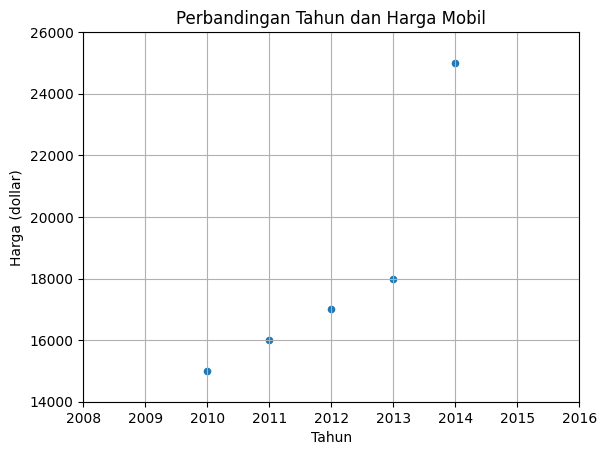

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
mobil_df.plot(kind='scatter', x='tahun', y='harga')

# Menambahkan judul dan label
plt.title('Perbandingan Tahun dan Harga Mobil')
plt.xlabel('Tahun')
plt.ylabel('Harga (dollar)')
plt.xlim(2008, 2016)
plt.ylim(14000, 26000)
plt.grid(True)
plt.show()



Simple Linear Regression Model

Penyesuaian Dataset

In [27]:
import pandas as pd
import numpy as np

X = np.array(mobil_df['tahun'])
y = np.array(mobil_df['harga'])

print(f'X: {X}')
print(f'y: {y}')


X: [2010 2011 2012 2013 2014]
y: [15000 16000 17000 18000 25000]


In [30]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [32]:
X

array([[2010],
       [2011],
       [2012],
       [2013],
       [2014]], dtype=int64)

TRAINING SIMPLE LINEAR REGRESSION MODEL

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()


Visualisasi Simple Linear Regression Model

In [39]:
X_vis = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_vis = model.predict(X_vis)

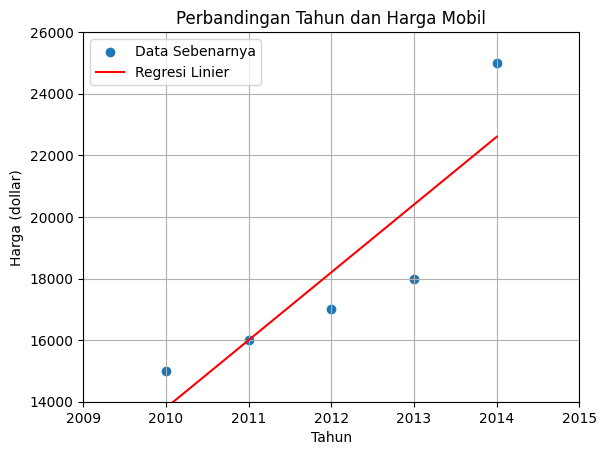

In [40]:
plt.scatter(X, y, label='Data Sebenarnya')
plt.plot(X_vis, y_vis, '-r', label='Regresi Linier')

plt.title('Perbandingan Tahun dan Harga Mobil')
plt.xlabel('Tahun')
plt.ylabel('Harga (dollar)')
plt.xlim(X.min() - 1, X.max() + 1)
plt.ylim(y.min() - 1000, y.max() + 1000)
plt.grid(True)
plt.legend()
plt.show()

In [41]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: -4408200.0
slope: [2200.]


Mencari nilai slope

In [42]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[2010]
 [2011]
 [2012]
 [2013]
 [2014]]

X flatten: [2010 2011 2012 2013 2014]

y: [15000 16000 17000 18000 25000]


Variance

In [43]:
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 2.5



Covariance

In [45]:
np.cov(X.flatten(), y)

array([[2.50e+00, 5.50e+03],
       [5.50e+03, 1.57e+07]])

In [46]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 5500.0


Slope

In [47]:
slope = covariance_xy / variance_x
print(f'slope: {slope}')

slope: 2200.0


Mencari nilai intercept

In [52]:
slope = model.coef_[0]
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

intercept: -4408200.0


In [ ]:

Prediksi Harga mobil

In [56]:

tahun_mobil = np.array([2015, 2016, 2017]).reshape(-1, 1)
tahun_mobil


array([[2015],
       [2016],
       [2017]])

In [55]:
prediksi_harga = model.predict(tahun_mobil)
prediksi_harga

array([24800., 27000., 29200.])

In [57]:
# Menampilkan hasil prediksi
for i in range(len(tahun_mobil)):
    print(f'Tahun Mobil: {tahun_mobil[i][0]} -> Prediksi Harga Mobil: ${prediksi_harga[i]:,.2f}')

Tahun Mobil: 2015 -> Prediksi Harga Mobil: $24,800.00
Tahun Mobil: 2016 -> Prediksi Harga Mobil: $27,000.00
Tahun Mobil: 2017 -> Prediksi Harga Mobil: $29,200.00



Evaluasi Simple Linear Regression Model


Training & Testing Dataset

In [58]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])


Training Simple Linear Regression Model

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared

In [61]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


In [62]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


In [63]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


In [64]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
